In [1]:
import numpy as np
import pandas as pd
import seaborn as sns                   
import matplotlib.pyplot as plt         

In [3]:
df = pd.read_csv("index.csv")

In [5]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [7]:
df.shape

(1133, 6)

In [9]:
df.isnull().sum() 

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [11]:
df[df['card'].isnull()]['cash_type'].value_counts()

cash_type
cash    89
Name: count, dtype: int64

In [13]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Create columns for Month, Weekdays, and Hours
df['month'] = df['date'].dt.to_period('M').astype(str)  # YYYY-MM format
df['day'] = df['date'].dt.dayofweek.astype(str)  # 0 (Monday) to 6 (Sunday)
df['hour'] = df['datetime'].dt.hour.astype(str).str.zfill(2)  # Ensures two-digit format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [15]:
monthly_sales = df.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56


<Axes: >

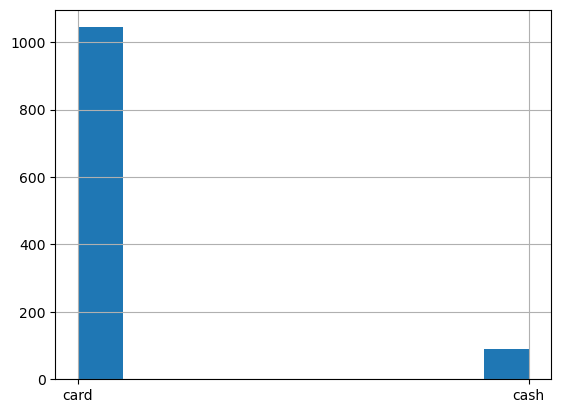

In [17]:
df['cash_type'].hist()

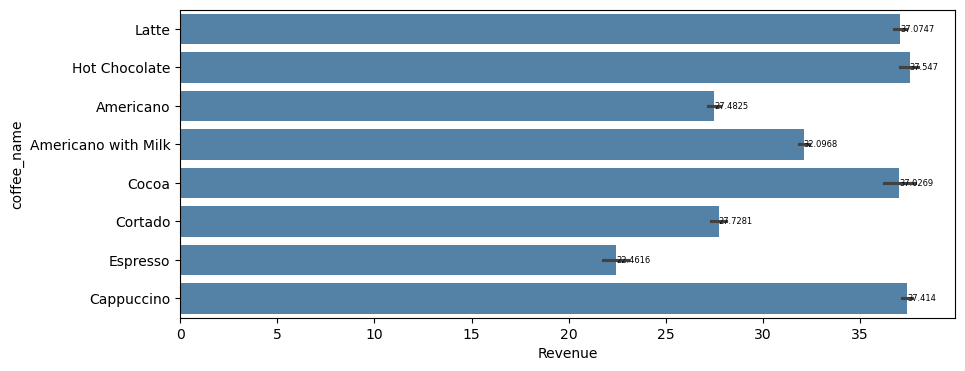

In [19]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(data=df, x='money', y='coffee_name', color='steelblue')

# Adding labels to bars
for container in ax.containers:
    ax.bar_label(container, fontsize=6)

plt.xlabel('Revenue')
plt.show()

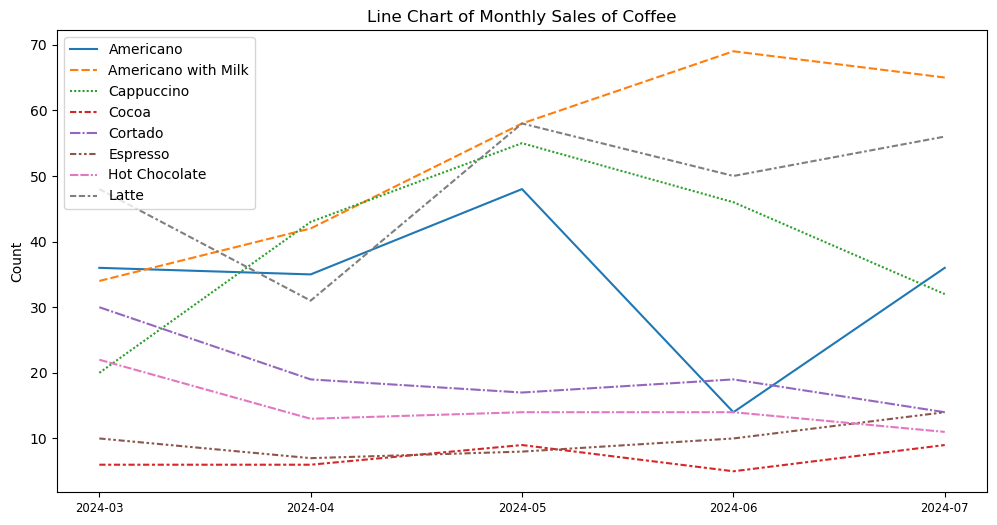

In [21]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=monthly_sales, alpha=1)

# Setting legend position
ax.legend(loc='upper left')

# Customizing x-axis ticks
ax.set_xticks(range(len(monthly_sales['month'])))
ax.set_xticklabels(monthly_sales['month'], fontsize='small')

# Adding labels and title
ax.set_title("Line Chart of Monthly Sales of Coffee")
ax.set_ylabel('Count')

plt.show()


In [23]:
weekday_sales = df.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,151
1,1,185
2,2,165
3,3,164
4,4,163
5,5,154
6,6,151


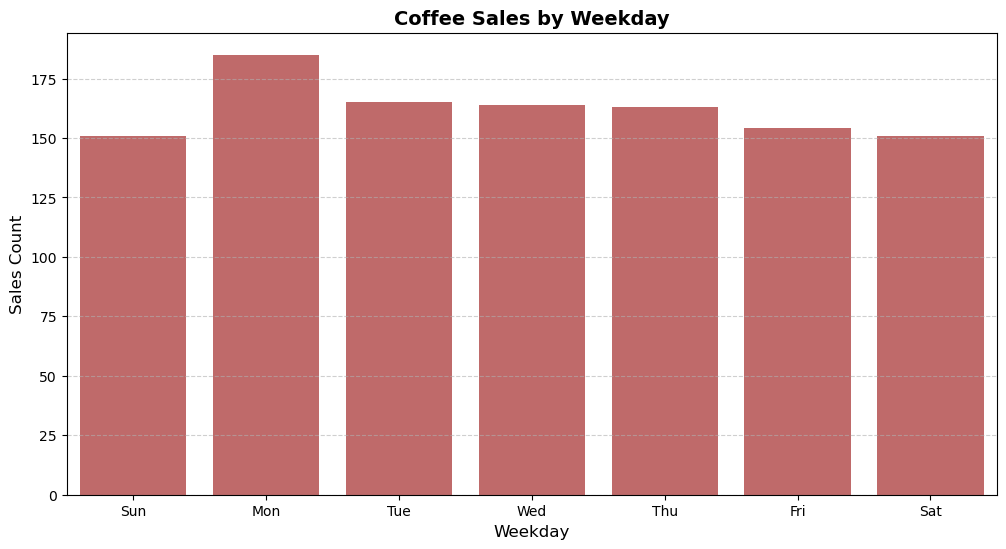

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_sales, x='day', y='count', color='indianred')  # Changed color
plt.xticks(range(len(weekday_sales['day'])), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], fontsize=10)  # Adjusted label size
plt.ylabel("Sales Count", fontsize=12)  # Improved label clarity
plt.xlabel("Weekday", fontsize=12)  # Added x-axis label for clarity
plt.title("Coffee Sales by Weekday", fontsize=14, fontweight='bold')  # Enhanced title
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Added gridlines for better readability
plt.show()


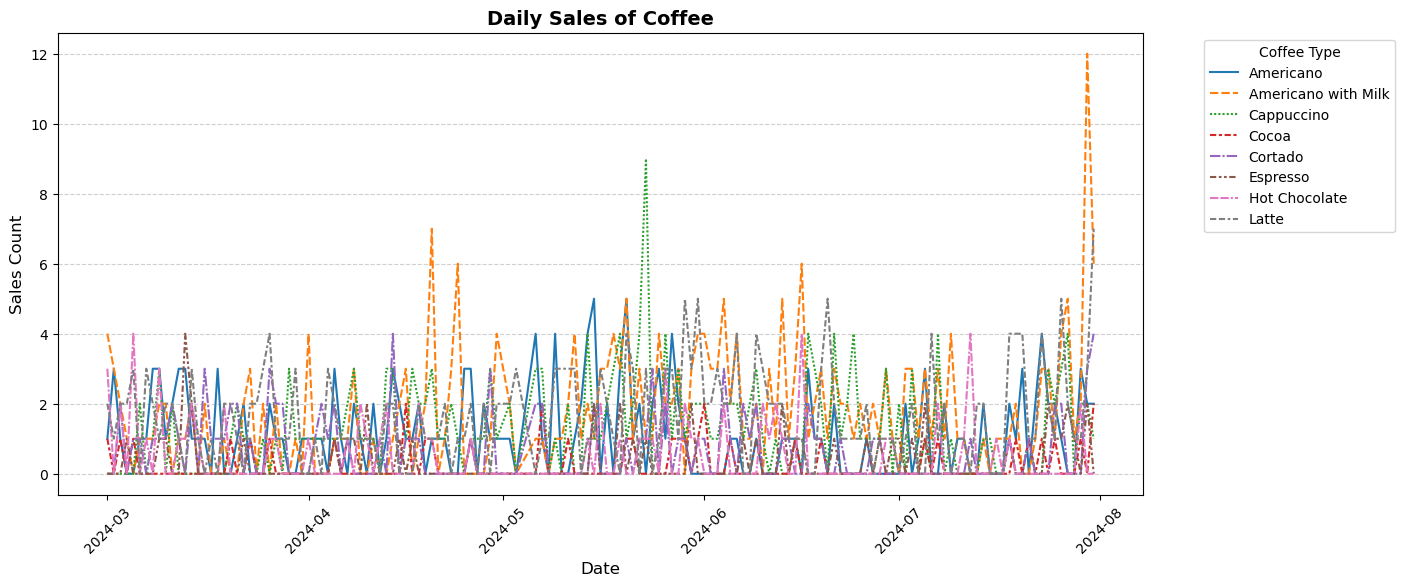

In [31]:
daily_sales = (
    df.groupby(['coffee_name', 'date'])
    .count()['datetime']
    .reset_index()
    .rename(columns={'datetime': 'count'})
    .pivot(index='date', columns='coffee_name', values='count')
    .reset_index()
    .fillna(0) )
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales.set_index('date'))  # Line plot for trend visualization
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales Count", fontsize=12)
plt.title("Daily Sales of Coffee", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Coffee Type", bbox_to_anchor=(1.05, 1), loc='upper left')  # Improved legend
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [35]:
hourly_sales = df.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales


,hour,count
0,07,13
1,08,44
2,09,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


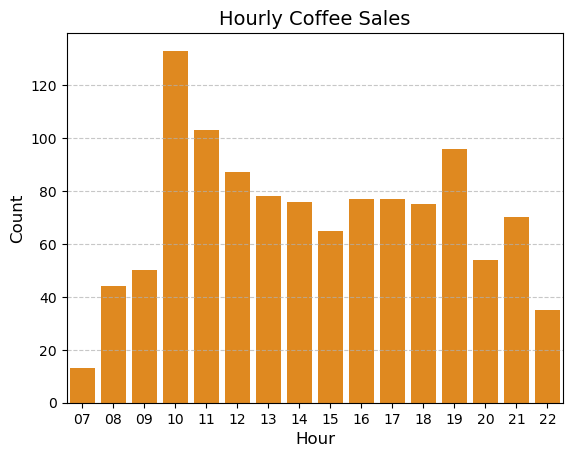

In [37]:
sns.barplot(data=hourly_sales, x="hour", y="count", color="darkorange")
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Hourly Coffee Sales", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)


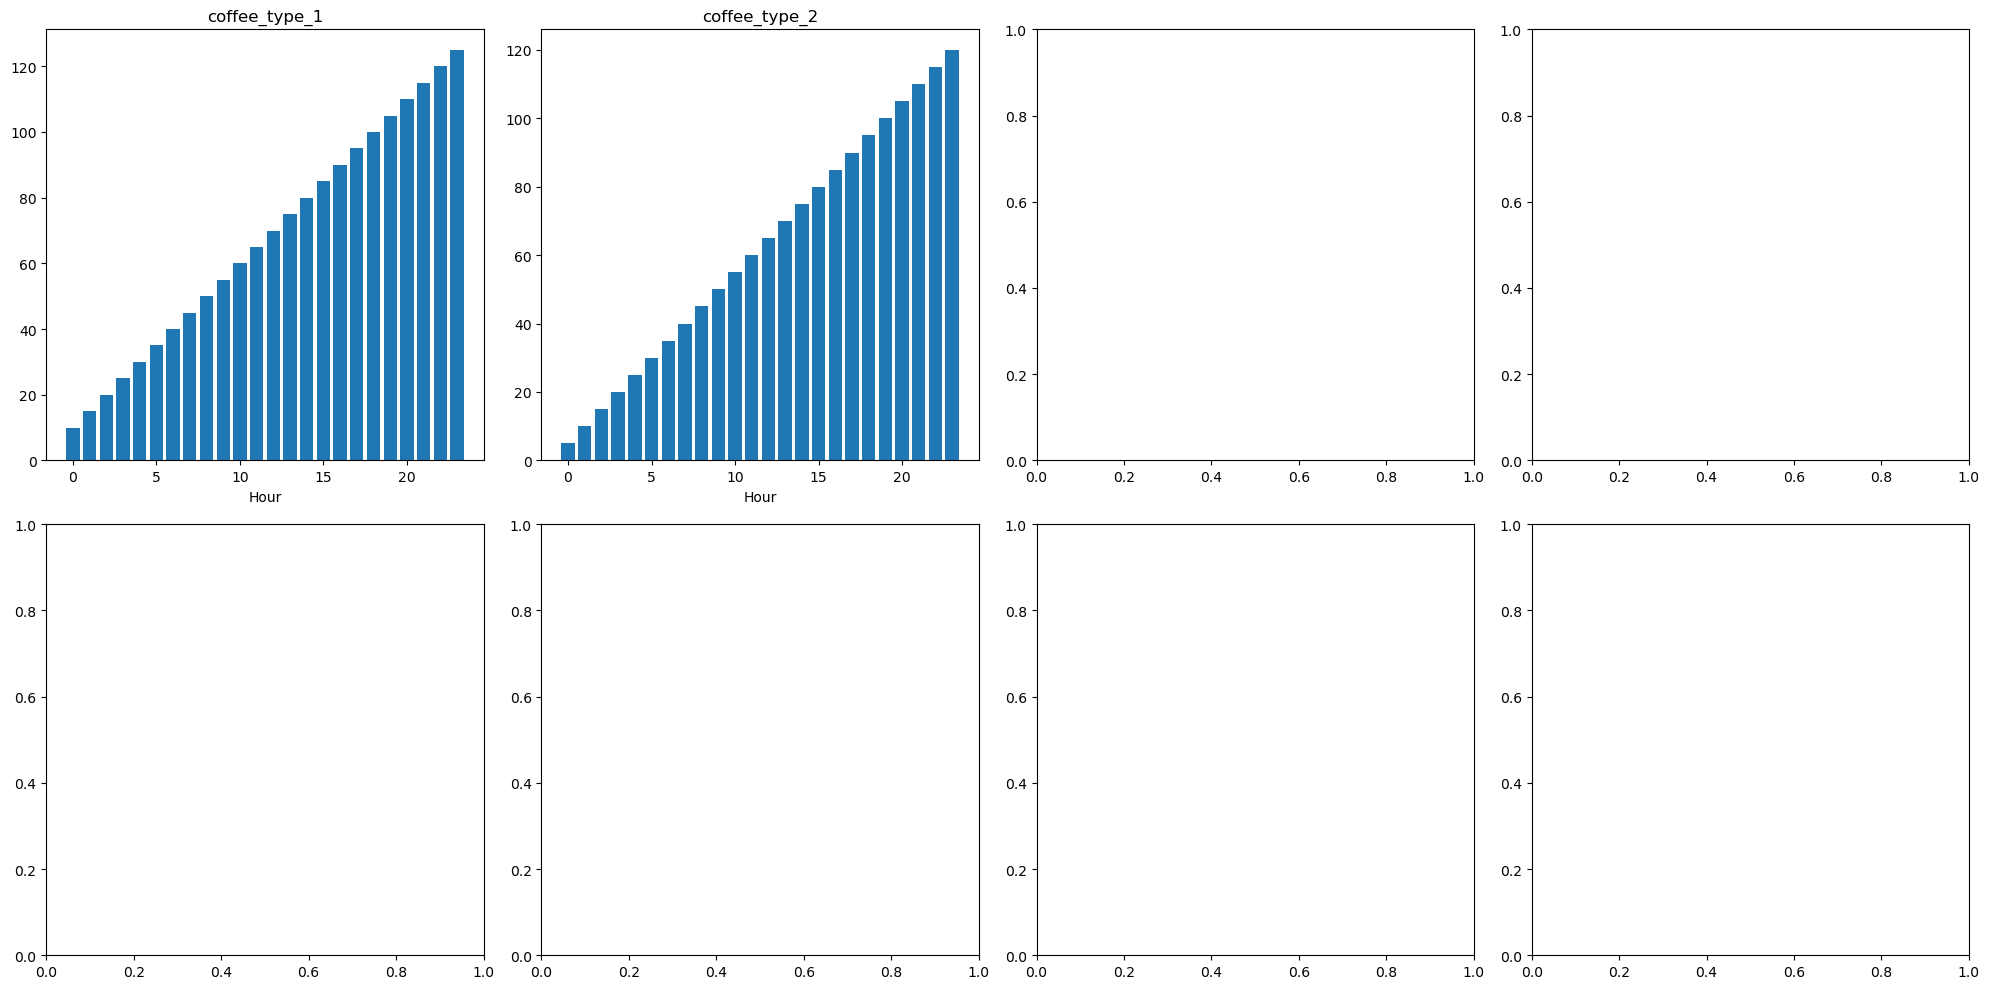

In [11]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
# Flatten the array of subplots for easy iteration
axs = axs.flatten()
# Loop through each column in the DataFrame, skipping the 'Index' column
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):
# Skip the first column ('Index')
    axs[i].bar(hourly_sales_by_coffee['hour'],hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
#axs[i].set_ylabel('Sales')
plt.tight_layout()
# Show the plot
plt.show()